In [1]:
#importing necesary modules
from geopy.geocoders import Nominatim
import pandas as pd
import numpy as np
import plotly.express as px
import src.shark_resources as sr
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
#Display all the columns
pd.set_option('display.max_columns', None)

In [3]:
#Read the dataset
sharks = pd.read_csv('data/attacks.csv', encoding='ISO-8859-1')

In [52]:
#Display dataset
sharks.head()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Month,Hemisphere
original order,,,,,,,,,,,,,,,,,
0,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,NaN,S.W. Baker,None,N
1,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,27,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",None,N
2,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,27,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",None,N
3,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,27,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",None,S
4,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,27,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",None,S


In [5]:
#Dropping unnecesary columns
sharks.drop(columns = ['pdf','Case Number','href formula', 'href','Case Number.1', 'Case Number.2', 'Unnamed: 22','Unnamed: 23'], inplace = True )

In [6]:
#Dropping empty rows
sharks.dropna(how='all', inplace = True)

In [7]:
#Checking cumber of empty data cells
sharks.isna().sum()

Date                         7
Year                         9
Type                        11
Country                     57
Area                       462
Location                   547
Activity                   551
Name                       217
Sex                        572
Age                       2838
Injury                      35
Fatal (Y/N)                546
Time                      3361
Species                   2845
Investigator or Source      24
original order               0
dtype: int64

In [8]:
#Restructuring "original order" column
sharks['original order'] = sharks['original order'].apply(lambda x : x-2).astype(int)

In [9]:
#Sorting "original order" column
sharks.sort_values('original order', ascending= True, inplace = True)

In [10]:
#Setting original order" column as new index
sharks.set_index('original order', drop = True, inplace = True)

In [11]:
#Dropping all empty rows with "original order" column as index
sharks.dropna(how = 'all', inplace = True)

In [12]:
#Checking cumber of empty data cells again
sharks.isna().sum()

Date                         0
Year                         2
Type                         4
Country                     50
Area                       455
Location                   540
Activity                   544
Name                       210
Sex                        565
Age                       2831
Injury                      28
Fatal (Y/N)                539
Time                      3354
Species                   2838
Investigator or Source      17
dtype: int64

In [13]:
#Cleaning "Age" column by finding ages only
sharks['Age'] = sharks['Age'].apply(lambda x : sr.find_age(x) if(np.all(pd.notnull(x))) else x)

In [14]:
#Setting "Age" column as float
sharks['Age'] = sharks['Age'].astype(float)

In [15]:
#Substituting NaN with column average
sharks['Age'].fillna(sharks['Age'].mean(), inplace = True)

In [16]:
#Verifying the changes in "Age" column
q = list(sharks['Age'])
q

[15.0,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 16.0,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 13.0,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 27.314194112503642,
 50.0,
 27.314194112503642,
 27.314194112503642,
 27.31

In [17]:
#Setting "Age" column as int
sharks['Age'] = sharks['Age'].astype(int)

<AxesSubplot:ylabel='Frequency'>

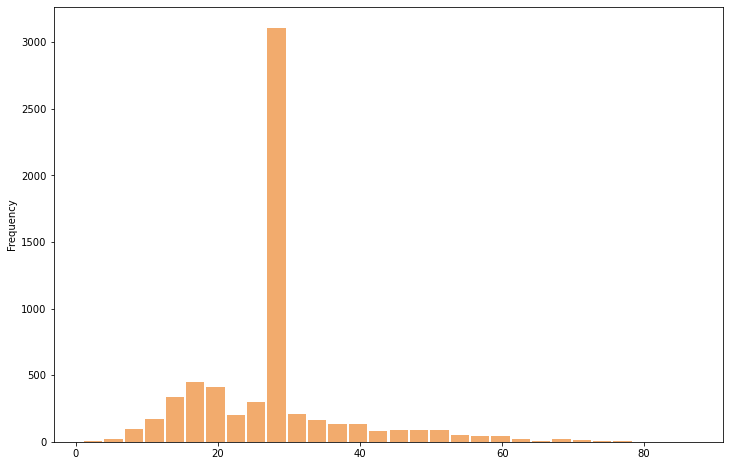

In [18]:
#Plotting histogram of "Age" column
sharks.Age.plot.hist(bins=30, color='#F2AB6D', rwidth=0.90, figsize=(12, 8))

In [19]:
#Displaying aparent range of ages in risk
display(sharks.groupby('Age').count().iloc[12:20]['Date'])

Age
14    101
15    139
16    139
17    156
18    153
19    142
20    150
21    122
Name: Date, dtype: int64

In [20]:
#Cleaning "Gender" column by dropping a small number of misfilled cells
gender = sharks.groupby('Sex ').count().drop(labels = ['.','N','M ','lli'], axis = 0)
gender

,Date,Year,Type,Country,Area,Location,Activity,Name,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
Sex,,,,,,,,,,,,,,
F,637,637,637,634,616,608,584,631,637,637,579,385,370,634
M,5094,5092,5090,5052,4723,4651,4754,5036,5094,5080,4691,2456,2770,5082


<AxesSubplot:ylabel='Date'>

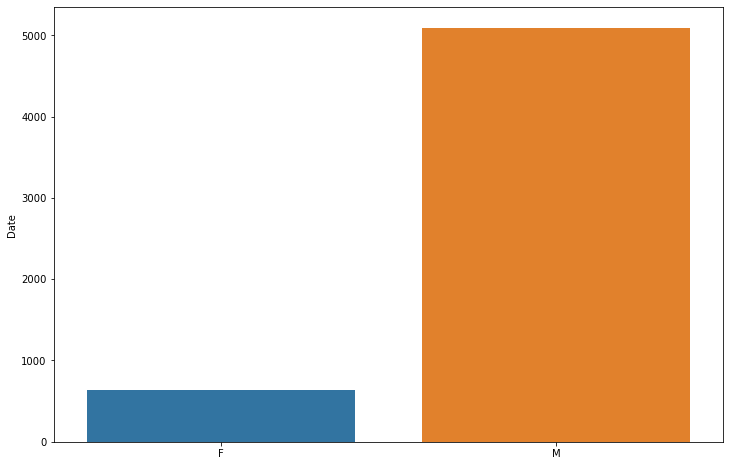

In [21]:
#Plotting number of reported attacks grouped by gender
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x = ['F','M'], y=gender['Date'])

In [22]:
#Grouping dataset by country
countries = sharks.groupby('Country').count()

In [23]:
#Getting the countries with the most reported attacks
countries_filtered = countries[countries['Date'] >= 500]

In [24]:
#Displaying the countries with the most reported attacks
display(countries_filtered)
countries_filtered.to_csv('paises_datos.csv')

,Date,Year,Type,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
Country,,,,,,,,,,,,,,
AUSTRALIA,1338,1337,1337,1324,1294,1215,1319,1197,1338,1332,1225,596,792,1336
SOUTH AFRICA,579,579,579,574,571,535,566,515,579,578,515,349,420,577
USA,2229,2229,2229,2225,2178,2095,2199,2131,2229,2224,2041,1384,1323,2222


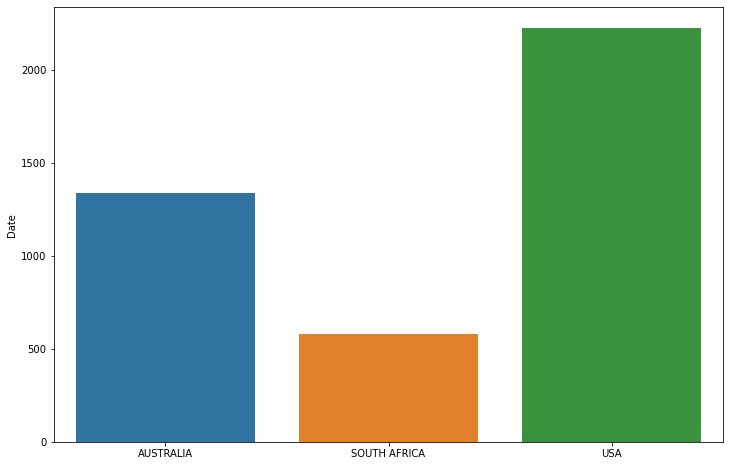

In [25]:
#Plotting the countries with the most reported attacks
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x = list(countries_filtered.index), y=countries_filtered['Date'])

In [26]:
#Getting a list with the unique types of attackes
list(sharks['Type'].unique())

['Unprovoked',
 'Boat',
 'Sea Disaster',
 'Provoked',
 'Invalid',
 'Boating',
 nan,
 'Boatomg',
 'Questionable']

In [27]:
#Filling NaN with "other"
sharks['Type'].fillna(value ='other', inplace = True)

In [28]:
#Grouping all similar types into one "boat" category and non descriptive types into "other"
sharks['Type'].replace({'Boating' : 'Boat', 'Boatomg' : 'Boat', 'Invalid' : 'Other', 'other' : 'Other', 'Questionable' : 'Other'}, inplace = True)

In [29]:
#Checking the changes to "type" column
list(sharks['Type'].unique())

['Unprovoked', 'Boat', 'Sea Disaster', 'Provoked', 'Other']

In [30]:
#Displaying data by "type"
sharks.groupby('Type').count().reset_index()

,Type,Date,Year,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,Boat,341,341,340,316,321,297,327,134,341,338,339,97,248,341
1,Other,553,552,548,504,499,431,498,479,553,546,28,158,528,548
2,Provoked,574,574,571,540,527,539,565,517,574,574,572,184,412,574
3,Sea Disaster,239,239,231,172,167,228,184,174,239,238,235,50,35,239
4,Unprovoked,4595,4594,4562,4315,4248,4263,4518,4433,4595,4578,4589,2459,2241,4583


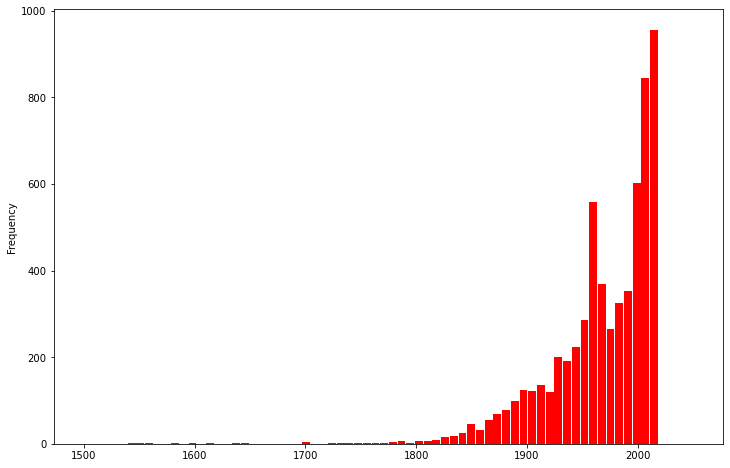

In [53]:
#Plotting number of reports per year
sharks.Year.plot.hist(bins=70, color='Red', rwidth=0.90, figsize=(12, 8), range = [1500,2050])

In [32]:
#visualization of "fatal (Y/N)" data
sharks.groupby('Fatal (Y/N)').count()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Time,Species,Investigator or Source
Fatal (Y/N),,,,,,,,,,,,,,
N,7,7,7,7,7,7,5,6,7,7,7,3,5,7
2017,1,1,1,1,1,1,1,1,1,1,1,1,1,1
M,1,1,1,1,1,1,1,1,1,1,1,1,1,1
N,4293,4293,4293,4274,4087,4018,4018,4227,3945,4293,4293,2293,2497,4282
N,1,1,1,1,1,1,0,1,0,1,1,0,0,1
UNKNOWN,71,71,71,69,64,60,36,63,40,71,51,7,17,70
Y,1388,1387,1388,1364,1198,1191,1282,1310,1281,1388,1387,497,427,1388
y,1,1,1,1,0,1,1,1,1,1,1,0,0,1


In [33]:
#Filtering data by "Sex" and "Fatal (Y/N)"
fatal_filtered = sharks[((sharks['Fatal (Y/N)'] == 'N') | (sharks['Fatal (Y/N)'] == 'Y')) & ((sharks['Sex '] == 'F') | (sharks['Sex '] == 'M'))]
fatal_csv = fatal_filtered.groupby('Sex ').count()

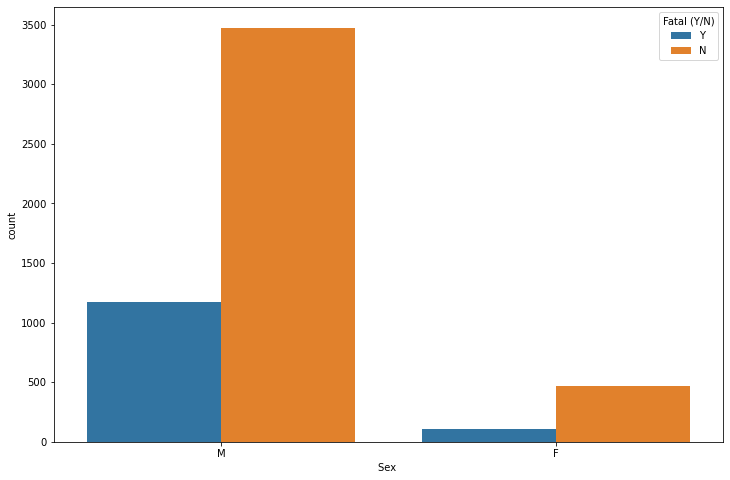

In [54]:
#Plotting the filtered data
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(x=fatal_filtered['Sex '], hue=fatal_filtered['Fatal (Y/N)'])

In [35]:
#Grouping data by "Fatal (Y/N)"
fatal_csv = fatal_filtered.groupby('Fatal (Y/N)').count()

In [36]:
#Verifying grouped data
fatal_csv

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Time,Species,Investigator or Source
Fatal (Y/N),,,,,,,,,,,,,,
N,3941,3941,3941,3923,3760,3693,3739,3919,3941,3941,3941,2216,2278,3931
Y,1279,1278,1279,1258,1115,1107,1193,1250,1279,1279,1278,481,403,1279


In [38]:
#Grouping data by "Sex" and "Fatal (Y/N)"
genero = pd.DataFrame(fatal_filtered.groupby(['Sex ', 'Fatal (Y/N)'])['Sex '].count())

In [39]:
#Verifying grouped data
genero

Sex 
Sex  Fatal (Y/N)      
F    N             467
     Y             107
M    N            3474
     Y            1172

In [40]:
#Checking number of countries registered
len(sharks['Country'].unique())

213

In [41]:
#Creating a new column with the months obtained from column "Date"
sharks['Month'] = sharks['Date'].apply(lambda x : sr.find_month(x) if(np.all(pd.notnull(x))) else x)

In [42]:
#Verifying grouped "Month" data
sharks.groupby('Month').count()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
Month,,,,,,,,,,,,,,,
Apr,420,420,420,415,400,398,386,410,397,420,419,375,236,251,416
Aug,556,555,556,554,529,521,515,544,520,556,555,491,294,321,554
Dec,415,415,415,412,393,390,374,403,367,415,412,378,210,234,414
Feb,356,356,356,355,341,332,335,350,321,356,355,335,187,208,356
Jan,494,493,494,492,474,473,457,477,434,494,492,442,237,311,494
Jul,621,621,621,616,576,574,570,604,581,621,621,568,303,334,619
Jun,475,475,475,473,445,449,448,463,445,475,473,435,258,274,474
Mar,381,381,381,379,357,352,354,370,350,381,381,352,195,222,381
May,358,358,358,358,327,330,331,350,332,358,356,332,197,204,358


In [43]:
#Saving countries in a list
lista = list(sharks.Country.unique())

In [44]:
#Iterating throu country list to obtain hemisphere of each country
f = {}
for x in lista:
    f[x] = sr.geolocate(x)
print(f)

{'CEYLON (SRI LANKA)': 'N', 'PANAMA': 'N', 'USA': 'N', 'AUSTRALIA': 'S', 'ASIA?': 'N', 'SOUTH AFRICA': 'S', 'FIJI': 'S', 'VIETNAM': 'N', 'REUNION': 'S', 'BELIZE': 'N', 'GREECE': 'N', 'ITALY': 'N', 'BURMA': 'N', 'PAPUA NEW GUINEA': 'S', 'PACIFIC OCEAN': 'S', 'SAUDI ARABIA': 'N', 'IRAQ': 'N', 'IRAN': 'N', 'SOLOMON ISLANDS': 'S', nan: 'N', 'KIRIBATI': 'S', 'NORTH PACIFIC OCEAN': 'N', 'MARSHALL ISLANDS': 'N', 'CUBA': 'N', 'NICARAGUA': 'N', 'INDIA': 'N', 'INDONESIA': 'S', 'BAHAMAS': 'N', 'MADAGASCAR': 'S', 'BERMUDA': 'N', 'SEYCHELLES': 'S', 'MOZAMBIQUE': 'S', 'SINGAPORE': 'N', 'MEDITERRANEAN SEA': 'N', 'RED SEA?': 'N', 'VANUATU': 'S', 'SUDAN': 'N', 'FRENCH POLYNESIA': 'S', 'KOREA': 'N', 'BAHREIN': 'N', 'VENEZUELA': 'N', 'SRI LANKA': 'N', 'NEW ZEALAND': 'S', 'LIBYA': 'N', 'DJIBOUTI': 'N', 'SPAIN': 'N', 'LEBANON': 'N', 'URUGUAY': 'S', 'KENYA': 'N', 'CANADA': 'N', 'MEXICO': 'N', 'FRANCE': 'N', 'Between PORTUGAL & INDIA': nan, 'GUINEA': 'N', 'BARBADOS': 'N', 'ROATAN': 'N', 'ICELAND': 'N', 'SWED

In [46]:
#Saving hemisphere of each country in a column
sharks['Hemisphere'] = sharks['Country'].apply(lambda x : f[x] if(np.all(pd.notnull(x))) else x)

In [47]:
#Filtering "Hemisphere" data to obtain only north and south values ("N","S")
hemisferio = sharks[(sharks['Hemisphere'] == 'S') | (sharks['Hemisphere'] == 'N')]

In [48]:
#Grouping data by "Hemisphere" and "Month"
hemisferio_filtrado = pd.DataFrame(hemisferio.groupby(['Hemisphere', 'Month'])['Hemisphere'].count())

In [49]:
#Verifying grouped data by "Hemisphere" and "Month"
hemisferio_filtrado

Hemisphere
Hemisphere Month            
N          Apr           207
           Aug           447
           Dec           113
           Feb            91
           Jan            98
           Jul           488
           Jun           341
           Mar           142
           May           223
           Nov           164
           Oct           255
           Sep           389
S          Apr           207
           Aug           107
           Dec           299
           Feb           264
           Jan           393
           Jul           127
           Jun           132
           Mar           237
           May           135
           Nov           210
           Oct           159
           Sep           127

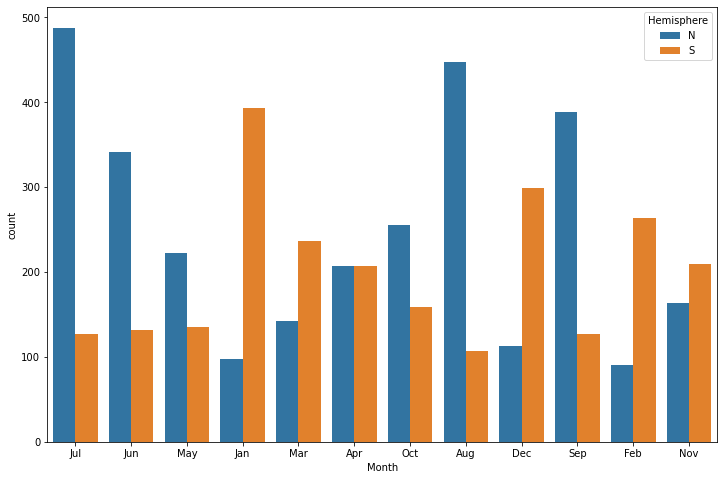

In [55]:
#Plotting grouped data by "Hemisphere" and "Month"
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(x=hemisferio['Month'], hue=hemisferio['Hemisphere'])
plt.savefig('epoca.jpg')

In [51]:
#Saving data to csv
sharks.Age.to_csv("edad.csv")
sharks.to_csv("sharks_limpio.csv")
genero.to_csv('genero.csv')
fatal_filtered.to_csv('genero_graph.csv')
hemisferio_filtrado.to_csv('hemisferio.csv')
hemisferio.to_csv('hemisferio_graph.csv')